<a href="https://colab.research.google.com/github/furqatnizomov/pnevmoniya/blob/main/Pnevmaniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip install fastai==2.7.8

In [38]:
import fastai as ft
ft.__version__

'2.7.8'

In [39]:
from fastai.vision.all import *
from ipywidgets import widgets

In [40]:
path = '/home/furqat/Downloads/pnevmoniya/train'
path2 = '/content/drive/MyDrive/pnevmoniya'

In [24]:
!ls

drive  sample_data


In [41]:
def pnevmoniyami(x): return "bacteria" in x

In [42]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    train = 'train',
    valid = 'train',
    seed=42,
    label_func=pnevmoniyami,
    item_tfms=Resize(224)
)


TypeError: ignored

In [32]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.880558,0.668874,0.729060,14:49


epoch,train_loss,valid_loss,accuracy,time
0,0.621076,0.552547,0.748718,02:02
1,0.486669,0.473692,0.782906,02:02


In [33]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Pnevmoniyami?: True
Aniqlilik ehtimologi: 0.571


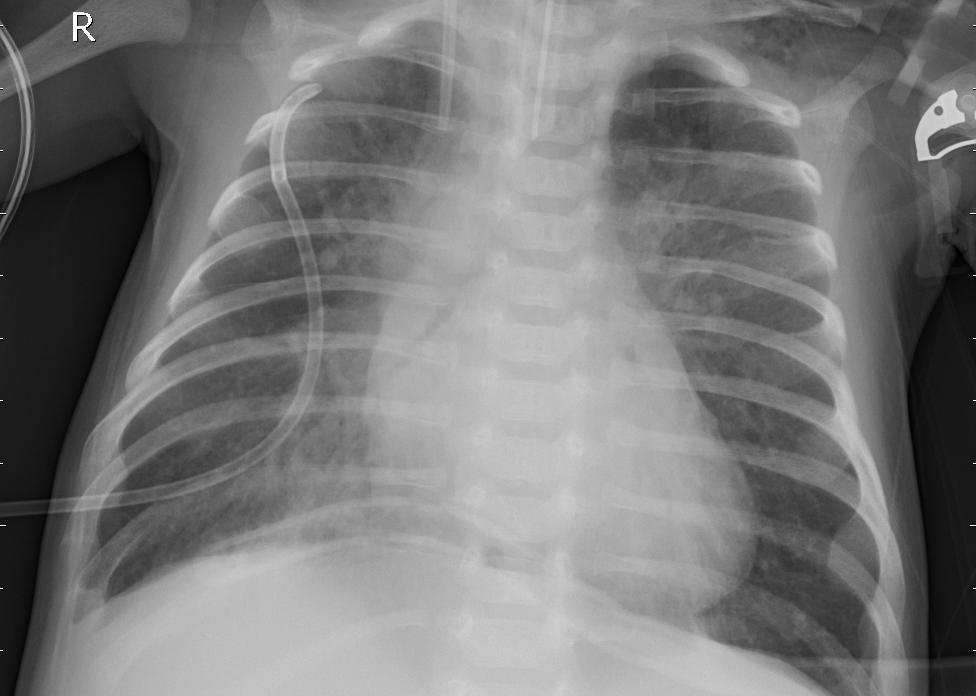

In [35]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Pnevmoniyami?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img

In [43]:
testing = '/content/drive/MyDrive/pnevmoniya/test'

In [47]:
natija = {}

In [66]:
for i in range(1,625):
  if i<10:
    img_name = "test_img_1000"+str(i)+".jpeg"
  elif i>=10 and i<100:
    img_name = "test_img_100"+str(i)+".jpeg"
  elif i>=100:
    img_name = "test_img_10"+str(i)+".jpeg"
  pred, _, prob = learn.predict('/content/drive/MyDrive/pnevmoniya/test/'+img_name)
  natija[img_name] = pred

In [67]:
import pandas as pd
df = pd.DataFrame()
df['id'] = natija.keys()
df['labels'] = natija.values()
df

,id,labels
0,test_img_10001.jpeg,True
1,test_img_10002.jpeg,False
2,test_img_10003.jpeg,False
3,test_img_10004.jpeg,False
4,test_img_10005.jpeg,False
...,...,...
619,test_img_10095.jpeg,False
620,test_img_10096.jpeg,False
621,test_img_10097.jpeg,False
622,test_img_10098.jpeg,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      624 non-null    object
 1   labels  624 non-null    object
dtypes: object(2)
memory usage: 9.9+ KB


In [69]:
df['labels'].replace("False", 0, inplace=True)
df['labels'].replace("True", 1, inplace=True)
df

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10095.jpeg,0
620,test_img_10096.jpeg,0
621,test_img_10097.jpeg,0
622,test_img_10098.jpeg,0


In [70]:
df.labels.value_counts()

0    445
1    179
Name: labels, dtype: int64

In [72]:
df.to_csv("sub2.csv",index=False)